# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load data

In [2]:
dataset = pd.read_csv("Company Profit.csv")

# Showing the five rows of dataset

In [3]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,Austin,192261.83
1,162597.70,151377.59,443898.53,Boston,191792.06
2,153441.51,101145.55,407934.54,Chicago,191050.39
3,144372.41,118671.85,383199.62,Austin,182901.99
4,142107.34,91391.77,366168.42,Chicago,166187.94


# Checking number of rows and columns

In [4]:
dataset.shape

(50, 5)

# Chicking unique values for State column

In [5]:
print(dataset['State'].unique())

['Austin' 'Boston' 'Chicago']


# Checking null values for each column

In [6]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# Checking for null Values and data types for each column

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# Statistics Information

In [8]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# How much the maximum amount spent for each department?

In [18]:
cols = ['R&D Spend', 'Administration', 'Marketing Spend']
def maximum_spend(df, max_dic={}):
    for col in cols:
        max_dic[col] = df[col].max()
    return max_dic

maximum_spend(dataset)

{'R&D Spend': 165349.2,
 'Administration': 182645.56,
 'Marketing Spend': 471784.1}

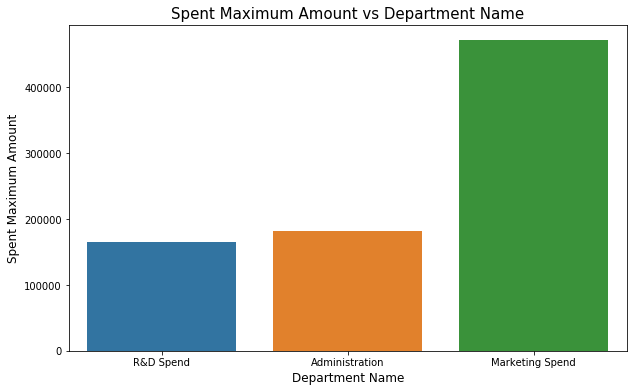

In [19]:
plt.figure(figsize=(10,6))

X = list(maximum_spend(dataset).keys())
y = list(maximum_spend(dataset).values())

sns.barplot(x = X, y = y)

plt.title('Spent Maximum Amount vs Department Name', fontsize=15)
plt.xlabel('Department Name', fontsize=12)
plt.ylabel('Spent Maximum Amount', fontsize=12)
plt.show()

# Checking outliers

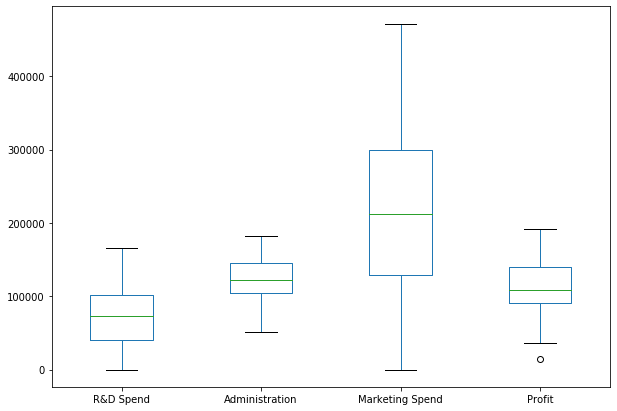

In [14]:
# dataset.plot.box()
dataset.plot(kind='box', figsize=(10,7))
plt.show()

There is one outlier value located in the Profit column 

# Remove Outlier values from dataset

In [15]:
q1 = dataset['Profit'].quantile(0.25)  # Calculating the first quantile 25% 

q3 = dataset['Profit'].quantile(0.75)  # Calculatin the third quantile 75%

IQR = q3 - q1                          # Calculatin Interquantile range

filter = (dataset['Profit'] >= q1 - 1.5*IQR) & (dataset['Profit'] <= q3 + 1.5*IQR) # Removing Outlier value from Profit dataset

dataset = dataset.loc[filter]   # Removing whole row that meet outlier value

dataset.shape    # Chicking the dataset shape after removing outlier value

(49, 5)

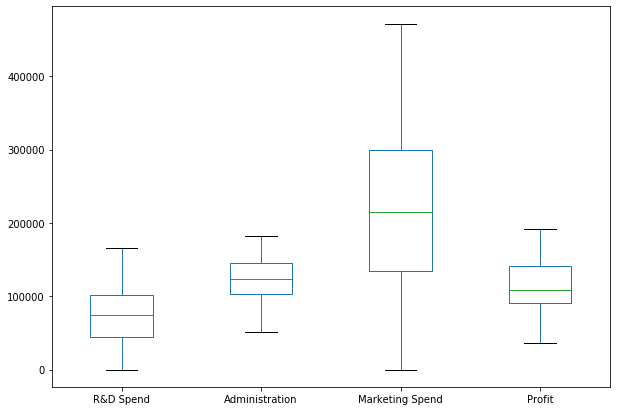

In [17]:
dataset.plot(kind='box', figsize=(10,7))

plt.show()

# Showing the correlation for numerical features

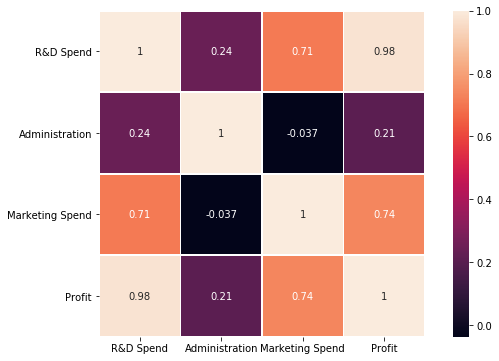

In [45]:
cols = ['R&D Spend','Administration','Marketing Spend','Profit']

plt.figure(figsize=(10,6))
cm = dataset[cols].corr()

sns.heatmap(
            data = cm,
            annot=True,
            square=True,
            linewidths=0.8,
            )
plt.show()

A strong positve correlation between 
- R&D Spend and Profit
- R&D Spend and Marketing Spend
- Marketing Spend and Profit.

A weak positve correlation between
- R&D Spend and Adminstration
- Adminstration and Profit


# Splitting data set into Independent X and Dependent Y Variable


In [12]:
X = dataset.iloc[:,:-1].values  

y = dataset.iloc[:,4].values

# Encoding categorical column ' State '

In [13]:
# imoort label encoder and one hot encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

# import column transform
from sklearn.compose import ColumnTransformer   

 # create object
label_encoder_X = LabelEncoder()  

# fitting and transforming an object for state column
X[:,-1] = label_encoder_X.fit_transform(X[:,-1])  

# 
onehotencoder_X = ColumnTransformer(
                                [('onehotencoder',OneHotEncoder(categories='auto'),[3])],
                                remainder='passthrough'
                                    ) 
X = onehotencoder_X.fit_transform(X)

# Removing one category to avoid dummy variable trap

In [14]:
X = X[:,1:]

# Splitting dataset to training and testing set


In [15]:
# import training testing split
from sklearn.model_selection import train_test_split

# Spliting X and y to  X traing, X test, y train and y test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [16]:
# import liner regression model
from sklearn.linear_model import LinearRegression

# create object
reg = LinearRegression()

# fit model for training set
reg.fit(X_train, y_train)

# printing intercept and coeficient 'slop'
print('intercept:', reg.intercept_, '\n')
print('ceficients:', reg.coef_, '\n')

print('score:', reg.score(X_train, y_train), '\n')

# printing predicted values
pred = reg.predict(X_test)
print('predicted values:', pred, '\n')

intercept: 51396.266580799274 

ceficients: [ 1.08092292e+03  8.36126713e+02  7.89823340e-01 -1.78314224e-02
  2.21064952e-02] 

score: 0.9605168985340985 

predicted values: [102852.68070034 170937.14238352 112122.12068621 101149.6243611
 101273.60100397  90725.84320403  90993.673959    76894.09242308
 159709.6678337  135819.61768552 135874.47275496  98910.50987184
  98969.97199872] 



# Visulaizing predicting and actual values

In [17]:
# creating data frame for actual values 'y test' and predicted values 'pred'
df = pd.DataFrame({'actual':y_test.round(2), 'predicted':pred.round(2)} )
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12
actual,101004.64,166187.94,105733.54,99937.59,97427.84,89949.14,96712.80,78239.91,155752.60,146121.95,144259.40,97483.56,96778.92
predicted,102852.68,170937.14,112122.12,101149.62,101273.60,90725.84,90993.67,76894.09,159709.67,135819.62,135874.47,98910.51,98969.97


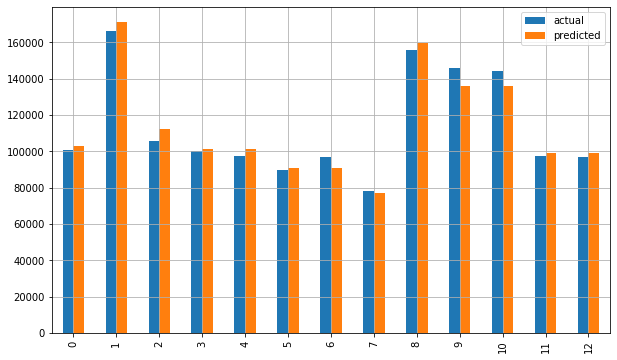

In [18]:
df.plot(kind='bar',figsize=(10,6))
plt.grid()

We can say about 69% from predicted values a little bit greater than actual values while 31% a little bit less than actual values.

# Finding RMSE aka root mean square error 

In [19]:
# import rmse
from sklearn.metrics import mean_squared_error

# calculate rmse
rmse = np.sqrt(mean_squared_error(y_test, pred))
print(rmse)

4938.905811844876


In [20]:
print('y mean:',y.mean().round(2) )
print('How does represent rmse of y mean:', round(rmse/y.mean(),2))

y mean: 113998.99
How does represent rmse of y mean: 0.04


**We can see the value of root mean squared error is about 4938.99, which is represented about 0.04 of the mean value which is 113998.99 . This means that our algorithm was very accurate.**

# Make a model with statsmodel 

In [21]:
# Add constant for X 
import statsmodels.api as sma

X = sma.add_constant(X)

In [22]:
# change a data type X from object to float

# create data frame for X
x_df = pd.DataFrame(X)

# change a data type to float
x = x_df.astype('float')

# convert X to array
x = x.values


In [23]:
# create new variable x_all with Values of X
x_all = x[:, [0,1,2,3,4,5]]

# fit statsmodel for x and y
reg_sm = sma.OLS(endog=y, exog=x_all).fit()
reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Fri, 18 Sep 2020   Prob (F-statistic):           2.51e-29
Time:                        22:48:46   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.143e+04   5812.919      8.847      0.000    3.97e+04    6.31e+04
x1          1954.0177   2751.932      0.710      0.482   -3595.783    7503.818
x2           389.7935   2788.050      0.140      0.889   -5232.845    6012.432
x3             0.7836      0.039     20.056      0.000       0.705       0.862
x4            -0.0220      0.044     -0.505      0.616      -0.110       0.066
x5             0.0258      0.014      1.804      0.078      -0.003       0.055
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.207
Skew:                           0.061   Prob(JB):                        0.902
Kurtosis:                       2.705   Cond. No.                     1.47e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R-squared:                        0.962**

**Adj. R-squared:                 0.957**

# Making optimal model

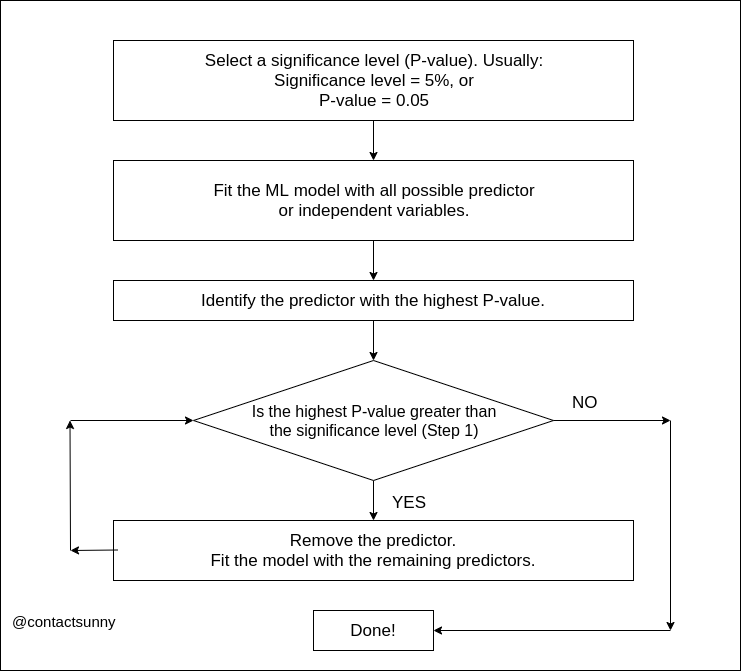

In [24]:
# Remove variable with highest p value (>0.05)

# Remove x2  0.889
x_all = x[:, [0,1,3,4,5]]

# fit statsmodel for x_all
reg_sm = sma.OLS(endog=y, exog=x_all).fit()
reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     276.9
Date:                Fri, 18 Sep 2020   Prob (F-statistic):           1.42e-30
Time:                        22:48:46   Log-Likelihood:                -505.98
No. Observations:                  49   AIC:                             1022.
Df Residuals:                      44   BIC:                             1031.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.155e+04   5684.696      9.067      0.000    4.01e+04     6.3e+04
x1          1771.7559   2396.402      0.739      0.464   -3057.875    6601.386
x2             0.7831      0.038     20.367      0.000       0.706       0.861
x3            -0.0217      0.043     -0.505      0.616      -0.109       0.065
x4             0.0262      0.014      1.875      0.067      -0.002       0.054
==============================================================================
Omnibus:                        0.041   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.980   Jarque-Bera (JB):                0.188
Skew:                           0.057   Prob(JB):                        0.910
Kurtosis:                       2.719   Cond. No.                     1.44e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R-squared:	0.962**

**Adj. R-squared:	0.958**

In [25]:
# Remove x3  0.616
x_all = x[:, [0,1,3,5]]

# fit statsmodel for x_all
reg_sm = sma.OLS(endog=y, exog=x_all).fit()
reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     375.3
Date:                Fri, 18 Sep 2020   Prob (F-statistic):           7.63e-32
Time:                        22:48:47   Log-Likelihood:                -506.12
No. Observations:                  49   AIC:                             1020.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.899e+04   2576.534     19.016      0.000    4.38e+04    5.42e+04
x1          1789.2471   2376.221      0.753      0.455   -2996.708    6575.202
x2             0.7756      0.035     22.037      0.000       0.705       0.846
x3             0.0283      0.013      2.154      0.037       0.002       0.055
==============================================================================
Omnibus:                        0.114   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.944   Jarque-Bera (JB):                0.280
Skew:                           0.091   Prob(JB):                        0.869
Kurtosis:                       2.677   Cond. No.                     6.91e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R-squared: 0.962**

**Adj.R-squared: 0.959**

In [26]:
# Remove x1  0.616
x_all = x[:, [0,3,5]]

# fit statsmodel for x_all
reg_sm = sma.OLS(endog=y, exog=x_all).fit()
reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Fri, 18 Sep 2020   Prob (F-statistic):           3.74e-33
Time:                        22:48:47   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
x1             0.7754      0.035     22.136      0.000       0.705       0.846
x2             0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R-squared: 0.961**

**Adj.R-squared: 0.959**

__We can say all variables have significante values so, p - value less than 0.05__

In [27]:
# Making Final model with significant variables

# Split
X_train , X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

# fit statsmodel with significant variable 
reg_2 = sma.OLS(endog=y_train, exog=X_train[:,[0,3,5]]).fit()

# predicting y test from x test with significant variables
pred2 = reg_2.predict(X_test[:,[0,3,5]])
pred2

array([103832.035574  , 169893.12574027, 112084.79743832, 100623.53678339,
       100654.31124154,  89125.17650885,  91298.07869316,  76559.73554484,
       159640.50056622, 135162.6719772 , 134683.08144251,  99882.36779301,
        98486.55884743])

# Finding RMSE aka root mean square error for the final model  

In [28]:
rmse2 = np.sqrt(mean_squared_error(y_test,pred2))
rmse2

5124.304970856389

In [29]:
print('rmse: ', rmse)
print('rmse2:', rmse2)

rmse:  4938.905811844876
rmse2: 5124.304970856389


In [30]:
print('score2:', reg_2.rsquared)

score2: 0.9603092493648233


In [35]:
print('y mean:',y.mean().round(2) )
print('proportion rmse of y mean:', round(rmse2/y.mean(),2))

y mean: 113998.99
proportion rmse of y mean: 0.04


After we made an optimal model with significant variables, we notice an increase at rmse2, and with that, the value of root mean squared error is represented about 0.04 of the mean value which is 113998.99, this means that our algorithm was very accurate.

In [32]:
# creating data frame for actual values 'y test' and predicted values 'pred'
df = pd.DataFrame({'actual':y_test.round(2), 'predicted':pred.round(2)} )
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12
actual,101004.64,166187.94,105733.54,99937.59,97427.84,89949.14,96712.80,78239.91,155752.60,146121.95,144259.40,97483.56,96778.92
predicted,102852.68,170937.14,112122.12,101149.62,101273.60,90725.84,90993.67,76894.09,159709.67,135819.62,135874.47,98910.51,98969.97


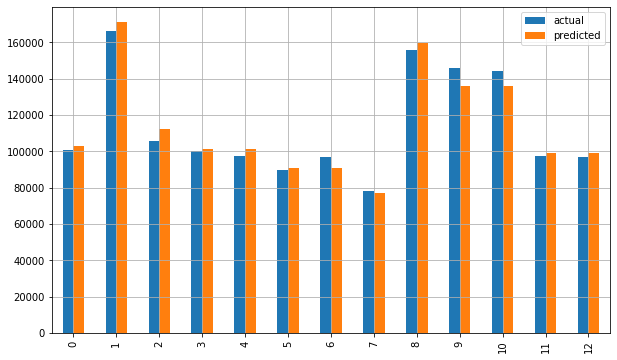

In [33]:
df.plot(kind='bar',figsize=(10,6))
plt.grid()

In [36]:
print('rmse: ', rmse)
print('y mean:',y.mean().round(2) )
print('Proportion rmse to y mean:', round(rmse2/y.mean(),2))

rmse:  4938.905811844876
y mean: 113998.99
Proportion rmse to y mean: 0.04
